# K-Means Clustering-Based Quantization
This notebook demonstrates how K-Means clustering can be applied to compress the weights of a neural network. By clustering weights and mapping them to cluster centers, we achieve efficient quantization with minimal loss in accuracy.

## Key Steps:
1. Define weights in a 2D array.
2. Apply K-Means clustering to group similar weights.
3. Map the weights to their cluster centers.
4. Quantize the weights and calculate the compression ratio.
5. Visualize the results.


In [1]:
# Import necessary libraries
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define original weights (32-bit float) as a 2D array
weights = np.array([
    [2.09, -0.98, 1.48, 0.09],
    [0.05, -0.14, -1.08, 2.12],
    [-0.91, 1.92, 0.0, -1.03],
    [1.87, 0.0, 1.53, 1.49]
])

# Display the original weights
print("Original Weights (32-bit float):")
print(weights)

# Apply K-Means clustering with 4 clusters (2-bit quantization)
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(weights.reshape(-1, 1))  # Flatten weights to fit KMeans

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Reshape labels to the original weight matrix dimensions
quantized_weights = labels.reshape(weights.shape)

print("\nCluster Centers (32-bit float):")
print(cluster_centers.flatten())

print("\nQuantized Weights (Cluster Index):")
print(quantized_weights)


Original Weights (32-bit float):
[[ 2.09 -0.98  1.48  0.09]
 [ 0.05 -0.14 -1.08  2.12]
 [-0.91  1.92  0.   -1.03]
 [ 1.87  0.    1.53  1.49]]

Cluster Centers (32-bit float):
[ 0.   2.  -1.   1.5]

Quantized Weights (Cluster Index):
[[1 2 3 0]
 [0 0 2 1]
 [2 1 0 2]
 [1 0 3 3]]


## Mapping Weights to Cluster Centers
After applying K-Means clustering, each weight is assigned to its nearest cluster center. This mapping reduces the precision needed to store the weights, as we only need to store the cluster indices and the cluster centers.


In [2]:
# Map quantized weights back to cluster centers
reconstructed_weights = np.take(cluster_centers, quantized_weights)

print("\nReconstructed Weights (Mapped to Cluster Centers):")
print(reconstructed_weights)



Reconstructed Weights (Mapped to Cluster Centers):
[[ 2.  -1.   1.5  0. ]
 [ 0.   0.  -1.   2. ]
 [-1.   2.   0.  -1. ]
 [ 2.   0.   1.5  1.5]]


## Reconstruction Error
Reconstruction error is the difference between the original weights and the reconstructed weights. This error helps us measure the quality of the quantization process. A lower error indicates that the quantization closely approximates the original weights.



Reconstruction Error (Difference Matrix):
[[ 0.09  0.02 -0.02  0.09]
 [ 0.05 -0.14 -0.08  0.12]
 [ 0.09 -0.08  0.   -0.03]
 [-0.13  0.    0.03 -0.01]]

Mean Squared Error (MSE): 0.005825


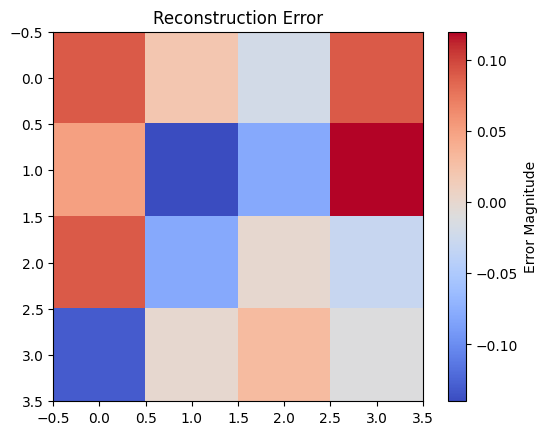

In [3]:
# Compute the reconstruction error
reconstruction_error = weights - reconstructed_weights

# Calculate the mean squared error (MSE) as a metric
mse = np.mean(reconstruction_error**2)

print("\nReconstruction Error (Difference Matrix):")
print(reconstruction_error)

print(f"\nMean Squared Error (MSE): {mse:.6f}")

# Visualize the reconstruction error
plt.imshow(reconstruction_error, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Error Magnitude')
plt.title("Reconstruction Error")
plt.show()


## Compression Calculation
We calculate the compression ratio achieved by quantization. The original weights require 32 bits per value, while the quantized weights require `log2(num_clusters)` bits per value plus the storage for the cluster centers.


In [4]:
# Calculate storage requirements
original_size = weights.size * 32  # 32 bits per weight
quantized_size = weights.size * np.log2(num_clusters) + num_clusters * 32  # Bits for indices + cluster centers

compression_ratio = original_size / quantized_size

print(f"\nOriginal Size: {original_size} bits")
print(f"Quantized Size: {quantized_size:.2f} bits")
print(f"Compression Ratio: {compression_ratio:.2f}x")



Original Size: 512 bits
Quantized Size: 160.00 bits
Compression Ratio: 3.20x


## Visualization
We visualize the original weights, cluster centers, and quantized weights for a better understanding of the quantization process.


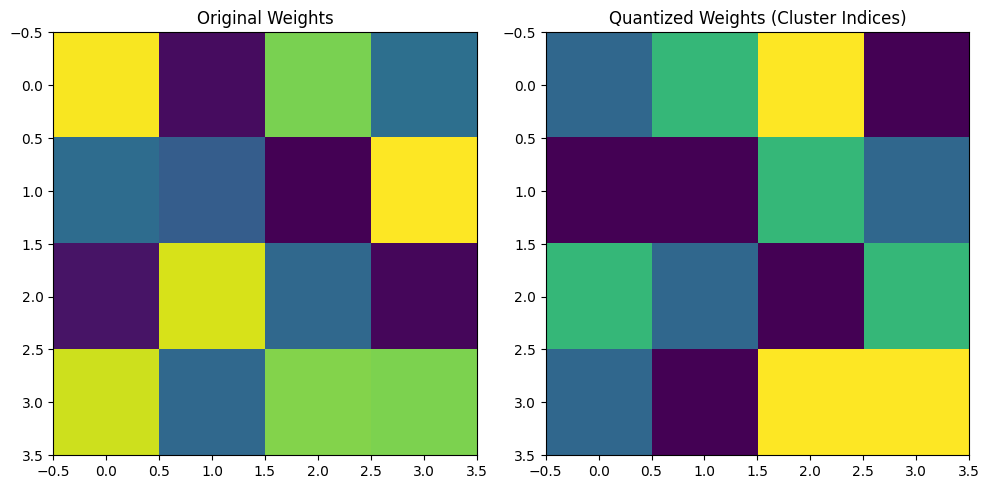

In [5]:
# Visualize the original and quantized weights
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(weights, cmap='viridis', interpolation='nearest')
axes[0].set_title("Original Weights")

axes[1].imshow(quantized_weights, cmap='viridis', interpolation='nearest')
axes[1].set_title("Quantized Weights (Cluster Indices)")

plt.tight_layout()
plt.show()
